In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 1.2**

In [2]:
def SRWabsorbing(p, tmax, length, Nsim, init_state):
    # function simulates a simple random walk with absorbing boundary conditions, taking in parameters:
    # p - probability of jumping up a step
    # tmax - number of time steps to simulate each realization 
    # length - number of states in S = {1, 2, ..., length}
    # Nsim - number of realizations 
    # init_state - initial starting point (must lie in S)
    q = 1 - p
    Y = np.zeros((Nsim,tmax+1)) # matrix holding simulations with Nsim rows
    Y[:,0] = init_state # first column contains starting point init_state at t = 0
    
    for k in range(Nsim): # for Nsim realizations...
        for j in range(tmax): # for tmax time steps...
            r = np.random.rand() # random number generator in Uniform(0,1)
            
            # closed boundary conditions: p(1,1) = p(length,length) = 1
            if Y[k,j] == 0 or Y[k,j] == length:
                x = 0
                    
            # at other states, we jump up with probability p and jump down with probability q
            else:        
                if r<p:
                    x = 1
                else:
                    x = -1
    
            Y[k,j+1] = Y[k,j] + x # state at time t + 1 is updated by x
        
    return Y

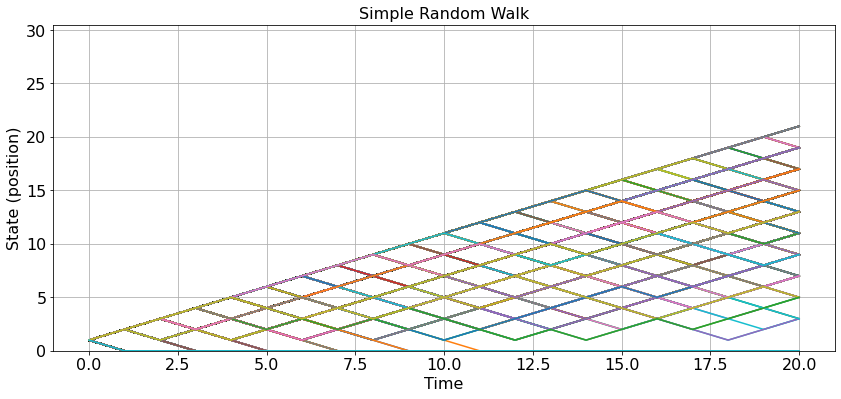

In [3]:
#Inputs
p = 0.8
tmax = 20
L = 30
y_0 = 1
N = 2500

Y = SRWabsorbing(p, tmax, L, N, y_0)

#plot the output matrix Y for a sanity check
plt.figure(figsize = (14,6))
for k in range(N):
    plt.plot(range(tmax+1), Y[k,:])
     
plt.xlabel('Time',fontsize=16)
plt.ylabel('State (position)',fontsize=16)
plt.title('Simple Random Walk',fontsize=16)

plt.xlim([-1, tmax+1])
plt.ylim([0, 30.5])
plt.grid()

/home/ndoyle/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


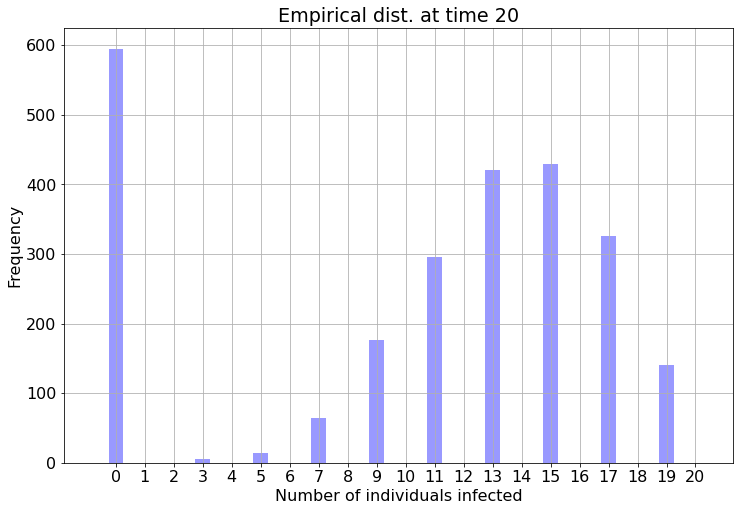

In [4]:
# empirical distribution at time t=20
t1 = 20
bins = np.arange(-0.75,20.75,0.5)

plt.figure(figsize = (12,8))
plt.title('Empirical dist. at time 20')
plt.grid()
sns.distplot(Y[:,t1], bins=bins, kde=False, color='b')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel("Number of individuals infected")
plt.ylabel("Frequency")
plt.show()

In [5]:
# proportion of simulations which fade out to 0 by time t = 20
(N - np.count_nonzero(Y[:,t1]))/N

0.238

**Exercise 1.4**

In [6]:
# drawing samples from an exponential distribution
us = np.random.uniform(size=5000)
lamb = 2

xs = -1/lamb*np.log(us)

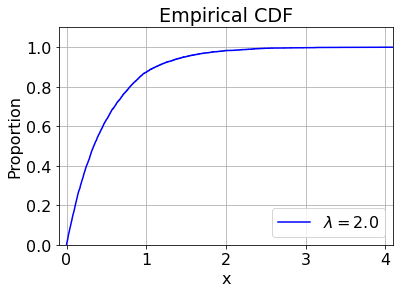

In [7]:
sns.ecdfplot(xs, color='b', label='$\\lambda = $%.1f' % lamb)
plt.xlabel('x')
plt.legend()
plt.title('Empirical CDF')
plt.ylim([0,1.1])
plt.xlim(-0.1,4.1)
plt.grid()

/home/ndoyle/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


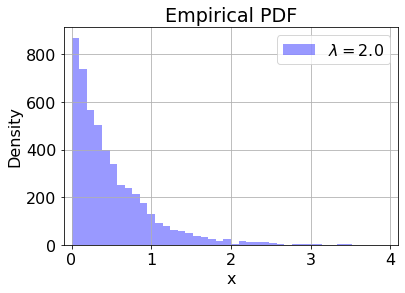

In [8]:
sns.distplot(xs, color='b', kde=False, label='$\\lambda = $%.1f' % lamb)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Empirical PDF')
plt.xlim(-0.1,4.1)
#plt.ylim([0,1.1])
plt.grid()

In [9]:
# mean (theoretical: 0.5)
print('Mean = %.3f' % xs.mean())

# variance (theoretical: 0.25)
print('Variance = %.3f' % (xs.std())**2)

Mean = 0.494
Variance = 0.247


**Exercise 1.5**

In [10]:
# generate Bernoulli distribution
p = 2/3
Nsim = 5000
berns = np.zeros(Nsim)

for i in range(Nsim):
    r = np.random.rand()
    if r < p:
        berns[i] = 1

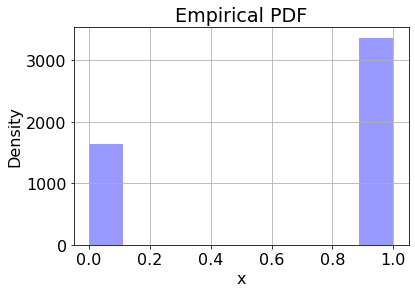

In [11]:
sns.distplot(berns, color='b', kde=False)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Empirical PDF')
#plt.xlim(-0.1,4.1)
#plt.ylim([0,1.1])
plt.grid()

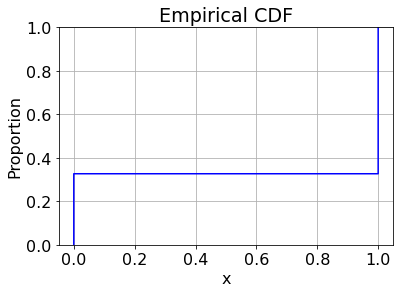

In [12]:
sns.ecdfplot(berns, color='b')
plt.xlabel('x')
plt.title('Empirical CDF')
#plt.ylim([0,1.1])
#plt.xlim(-0.1,4.1)
plt.grid()

In [13]:
# mean (theoretical: 2/3)
print('Mean = %.3f' % berns.mean())

# variance (theoretical: 2/9)
print('Variance = %.3f' % (berns.std())**2)

Mean = 0.673
Variance = 0.220


**Exercise 1.6**

In [14]:
def Bindist(p, trials, Nsim):
    # function which simulates Nsim binomial random variables, taking arguments:
    # p: probability of success
    # trials: number of Bernoulli trials
    # Nsim: number of Binomial RVs to simulate
    
    bins = np.zeros(Nsim)
    
    for i in range(Nsim):
        for j in range(trials):
            r = np.random.rand()
            if r < p:
                bins[i] += 1

    return bins

In [15]:
[pa, pb, pc] = [1,0.5,0.5]
[na, nb, nc] = [5,5,10]

BinA = Bindist(pa, na, 2000)
BinB = Bindist(pb, nb, 2000)
BinC = Bindist(pc, nc, 2000)

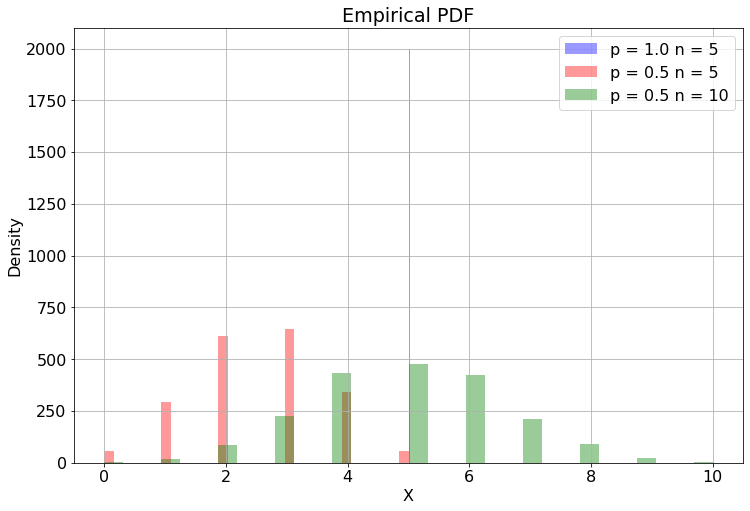

In [17]:
fig = plt.figure(figsize=[12,8])

sns.distplot(BinA, color='b', kde=False, label = 'p = %.1f n = %d' % (pa, na))
sns.distplot(BinB, color='r', kde=False, label = 'p = %.1f n = %d' % (pb, nb))
sns.distplot(BinC, color='g', kde=False, label = 'p = %.1f n = %d' % (pc, nc))
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Empirical PDF')
plt.legend()
plt.grid()

**Exercise 1.13**

In [18]:
def NeuronRV(p, N, a, sigma, s, NSim):
    r = np.random.rand()
    Vs = np.zeros(NSim)
    
    for i in range(NSim):
        Vsum = 0
        for j in range(N):
            if r < p:
                Vsum += np.random.normal(loc = a, scale = sigma)
        Vs[i] = Vsum + np.random.normal(loc = 0, scale = s)
    
    return Vs